<a href="https://colab.research.google.com/github/nirav3/data690_nirav/blob/main/assignments/assignment_4/assignment_04_part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment #4    
* Professor: Dr. Jay Wang    
* Student: Nirav Pancholi    
* Date: 09/28/2021

## Part B: Using Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/sample_data/census_costs.txt", sep="\t", skiprows=1)

df.head(5)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents


In [3]:
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  23
Number of Columns:  4


## Display first 10, last 10, and random 10 rows

In [4]:
df.head(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [5]:
df.tail(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
13,1920,"105,710,620","$25,117,000",23.76 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


In [6]:
df.sample(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
16,1950,"151,325,798","$91,462,000",60.44 cents
20,1990,"248,718,301","$2,492,830,000",$10.02
11,1900,"76,303,387","$11,854,000",15.54 cents
21,2000,"281,421,906",$4.5 Billion,$15.99
17,1960,"179,323,175","$127,934,000",71.34 cents
12,1910,"91,972,266","$15,968,000",17.07 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
2,1810,"7,239,881","$178,445",2.46 cents
10,1890,"62,979,766","$11,547,127",18.33 cents
0,1790,"3,929,214","$44,377",1.13 cents


## Find out the data types of all columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


In [8]:
df.dtypes

Census Year                object
Total Population           object
Census Cost                object
Average Cost Per Person    object
dtype: object

## Find out the summary statistics of all columns

In [9]:
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1830,"5,308,483","$66,109",71.34 cents
freq,1,1,1,1


## Cleanse the data

## User Defined Function: 
> This function cleans string that is provided to it.   

It removes; 
*              *(astrik), 
*              ","(comma), 
*              $(dollar sign), 
*              " "(white space), 
*              "\n"(new line)
  
> It replaces "Billion" with 0s

> It removes "cents" and convert to dollar value

In [10]:
def clean_data(data):
    data = data.replace("*","")
    data = data.replace(",","")
    data = data.replace("$","")
    data = data.replace(" ","")
    data = data.replace("\n","")

    if "Billion" in data:
        if "." in data:
            billion_minus_1 = "00000000"
            data = data.replace(".", "")
            data = data.replace("Billion", billion_minus_1)
        else:
            billion = "000000000"
            data = data.replace("Billion", billion)

    return int(data)

In [11]:
def clean_data_float(data):
    data = data.replace("$","")
    if "cents" in data:
        data = data.replace("cents", "")
        data_float = float(data)/100
        data = round(data_float,4)
    return float(data)  

In [12]:
df['Census Year'] = df.apply(lambda row : clean_data(row['Census Year']), axis = 1)
df['Total Population'] = df.apply(lambda row : clean_data(row['Total Population']), axis = 1)
df['Census Cost'] = df.apply(lambda row : clean_data(row['Census Cost']), axis = 1)
df['Average Cost Per Person'] = df.apply(lambda row : clean_data_float(row['Average Cost Per Person']), axis = 1)

In [13]:
df.dtypes

Census Year                  int64
Total Population             int64
Census Cost                  int64
Average Cost Per Person    float64
dtype: object

## Descibe the clean dataframe

In [14]:
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,9.445587e+08,3.368739
std,67.8233,9.622629e+07,2.830037e+09,9.278241
min,1790.0000,3.929214e+06,4.437700e+04,0.011300
25%,1845.0000,2.013067e+07,1.128361e+06,0.055100
50%,1900.0000,7.630339e+07,1.185400e+07,0.170700
75%,1955.0000,1.653245e+08,1.096980e+08,0.658900
max,2010.0000,3.087455e+08,1.300000e+10,42.110000


## Plot the average cost per person over time.

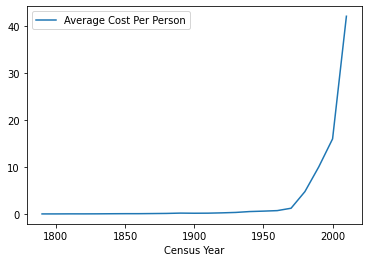

In [15]:
df.plot.line(x='Census Year', y='Average Cost Per Person')

## Plot the scatter plot of Total Population vs Total Cost.

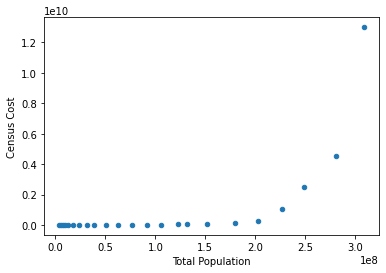

In [16]:
df.plot.scatter(x='Total Population', y='Census Cost')